In [13]:
import numpy as np
import pandas as pd 
import os

data = os.listdir("./input")
data

['test.ft.txt', 'train.ft.txt']

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bz2 # To open zipped files
import re # regular expressions
import os
import gc

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [15]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

In [16]:
AMAZON_REVIEW_DIR = './input'

In [17]:
#loading test file and train file
train_file = open(AMAZON_REVIEW_DIR + "/" +data[0],encoding="utf8")
test_file = open(AMAZON_REVIEW_DIR + "/" +data[1],encoding="utf8")

In [18]:
train_lines = train_file.readlines()
test_lines = test_file.readlines()

In [19]:
del train_file, test_file
gc.collect()

223

In [20]:
print(type(train_lines), type(test_lines), "\n")

print("Train Data Volume:", len(train_lines), "\n")
print("Test Data Volume:", len(test_lines), "\n\n")

print("Demo: ", "\n")
for x in train_lines[:2]:
    print(x, "\n")

<class 'list'> <class 'list'> 

Train Data Volume: 400000 

Test Data Volume: 3600000 


Demo:  

__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"
 

__label__2 One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic,

In [21]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_lines]
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_lines]

c:\Users\surya\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Train Labels distribution')

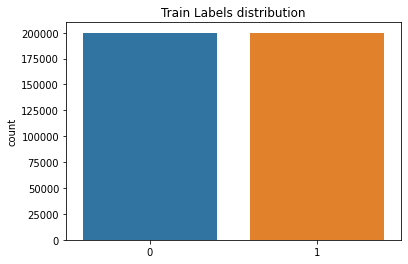

In [22]:
sns.countplot(train_labels)
plt.title('Train Labels distribution')

Text(0.5, 1.0, 'Test Labels distribution')

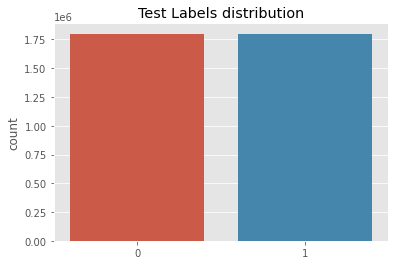

In [52]:
sns.countplot(test_labels)
plt.title('Test Labels distribution')

In [23]:
train_sentences = [x.split(' ', 1)[1][:-1] for x in train_lines]
test_sentences = [x.split(' ', 1)[1][:-1] for x in test_lines]

In [24]:
train_sentences[0]

'Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"'

c:\Users\surya\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Word Frequency Distribution in Reviews')

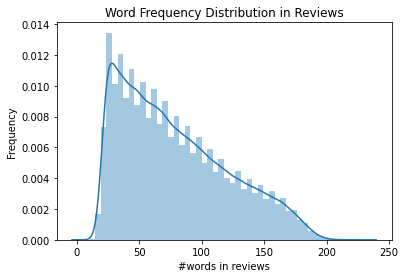

In [25]:
train_sentences_size = list(map(lambda x: len(x.split()), train_sentences))

sns.distplot(train_sentences_size)
plt.xlabel("#words in reviews")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution in Reviews")

In [26]:
train_label_len = pd.DataFrame({"labels": train_labels, "len": train_sentences_size})
train_label_len.head()

,labels,len
0,1,106
1,1,148
2,0,60
3,1,37
4,1,69


Negative mean length: 81.37
Positive mean length: 75.48
Mean Difference: 5.89


Text(0.5, 1.0, 'Review Size Categorization')

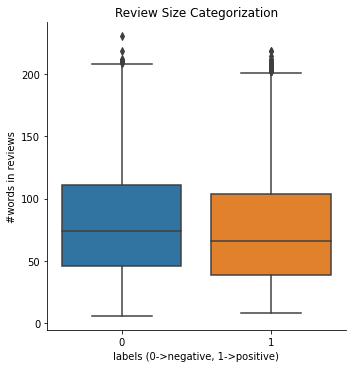

In [27]:
# Now we’ll divide it by sentiment and calculate average values

neg_mean_len = train_label_len.groupby('labels')['len'].mean().values[0]
pos_mean_len = train_label_len.groupby('labels')['len'].mean().values[1]

print(f"Negative mean length: {neg_mean_len:.2f}")
print(f"Positive mean length: {pos_mean_len:.2f}")
print(f"Mean Difference: {neg_mean_len-pos_mean_len:.2f}")
sns.catplot(x='labels', y='len', data=train_label_len, kind='box')
plt.xlabel("labels (0->negative, 1->positive)")
plt.ylabel("#words in reviews")
plt.title("Review Size Categorization")

In [58]:
del neg_mean_len,pos_mean_len
gc.collect()

103

In [28]:
# Clean URLs

for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])

for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

In [29]:
list(filter(lambda x: '<url>' in x, train_sentences))[0]

"My [Goodness]!!!!: world.....do noti repeatdo not get this camcorderthere is nothing worse than thisi wasted [money]buying it from <url>i could have gotten the same thing [for less]including firewire, 4 dv's, and a carrying caseIt is honestly the worst, disgusting, and despicable electronic out thereif you get this you will have literallyliterally threw [your money]into the atlantic oceanDO NOT GET THIS EVEN IF SOMEONE PAYS FOR IT. RETURN IT. GET YOUR MONEY BACK!!!!!!!"

In [65]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:
import nltk
from nltk import pos_tag
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

nltk.download('averaged_perceptron_tagger')

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

lemmatize_sent('He is WALKING walking to school')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['he', 'be', 'walking', 'walk', 'to', 'school']

In [32]:
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
# Combine the stopwords. Its a lot longer so I'm not printing it out...
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

In [33]:
# Clean Digits

def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stoplist_combined
            and not word.isdigit()]

In [34]:
train_sentences[10]

'Great book for travelling Europe: I currently live in Europe, and this is the book I recommend for my visitors. It covers many countries, colour pictures, and is a nice starter for before you go, and once you are there.'

In [35]:
preprocess_text(train_sentences[10])

['great',
 'book',
 'travel',
 'europe',
 'live',
 'europe',
 'book',
 'recommend',
 'visitor',
 'cover',
 'country',
 'colour',
 'picture',
 'nice',
 'starter']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=preprocess_text)

In [37]:
train_set = count_vect.fit_transform(train_sentences[:10000])

In [38]:
train_set.toarray().shape

(10000, 34854)

In [39]:
test_set = count_vect.transform(test_sentences[:1000])

<AxesSubplot:title={'center':'Most Frequent Words'}, xlabel='word'>

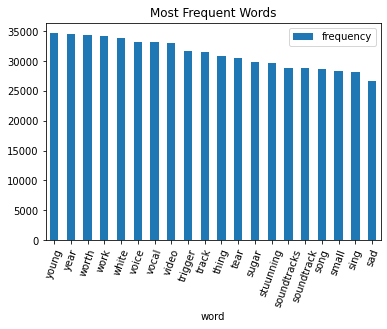

In [40]:
most_freq_words = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word', 'frequency'])[:100].sort_values(ascending=False, by = "frequency")[:20]
most_freq_words.plot.bar(x="word", y="frequency", rot=70, title="Most Frequent Words")

In [41]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [42]:
clf.fit(train_set, train_labels[:10000])

MultinomialNB()

In [43]:
from sklearn.metrics import accuracy_score

# To predict our tags (i.e. whether requesters get their pizza), 
# we feed the vectorized `test_set` to .predict()
predictions_valid = clf.predict(test_set)

print('Amazon Sentiment Analysis Accuracy = {}'.format(
        accuracy_score(predictions_valid, test_labels[:1000]) * 100)
     )

Amazon Sentiment Analysis Accuracy = 81.0


In [44]:
def important_features(vectorizer,classifier,n=40):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names()

    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]

    class1_frequency_dict = {}
    class2_frequency_dict = {}
    
    for coef, feat in topn_class1:
        class1_frequency_dict.update( {feat : coef} )

    for coef, feat in topn_class2:
        class2_frequency_dict.update( {feat : coef} )

    return (class1_frequency_dict, class2_frequency_dict)

In [45]:
neg_frequency_dict, pos_frequency_dict = important_features(count_vect, clf)

c:\Users\surya\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
neg_feature_freq = pd.DataFrame(neg_frequency_dict.items(), columns = ["feature_word", "frequency"])  
pos_feature_freq = pd.DataFrame(pos_frequency_dict.items(), columns = ["feature_word", "frequency"])  

<AxesSubplot:title={'center':'Important Negative Features(words)'}, xlabel='feature_word'>

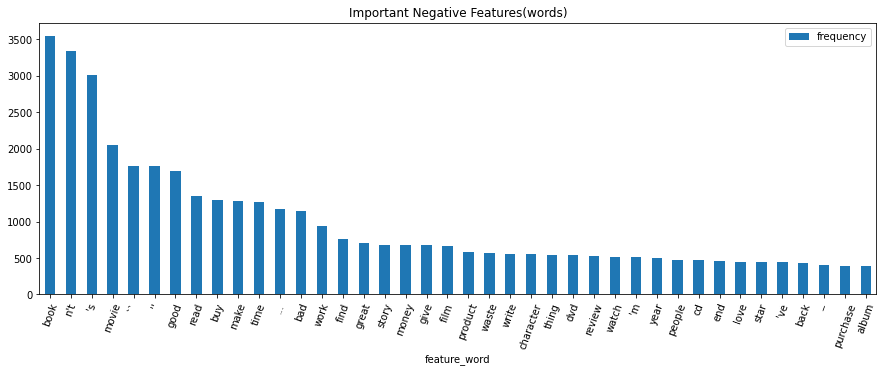

In [47]:
neg_feature_freq.plot.bar(x="feature_word", y="frequency", rot=70, figsize=(15, 5), title="Important Negative Features(words)")

<AxesSubplot:title={'center':'Important Positive Features(words)'}, xlabel='feature_word'>

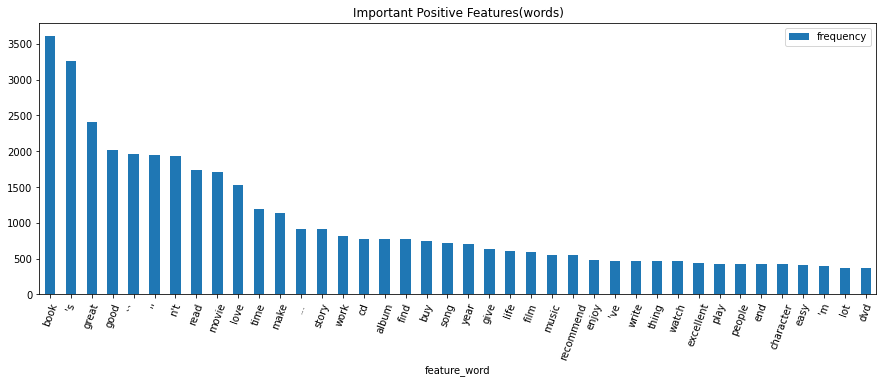

In [48]:
pos_feature_freq.plot.bar(x="feature_word", y="frequency", rot=70, figsize=(15, 5), title="Important Positive Features(words)")